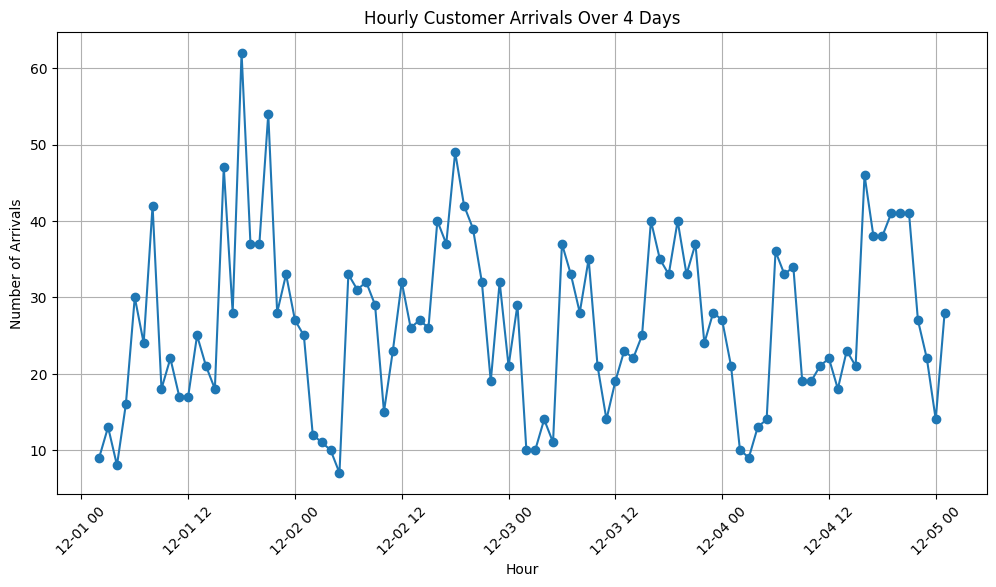

In [18]:
import numpy as np
import pandas as pd

def generate_hourly_arrivals(days):
    # Define time intervals and corresponding rates
    time_intervals = [
        (2, 6, 10),  # (start_hour, end_hour, rate)
        (6, 10, 32),
        (10, 16, 20),
        (16, 22, 40),
        (22, 24, 25),
        (0, 2, 25)  # Midnight to 2 AM
    ]

    # Prepare an array to store arrivals
    hourly_arrivals = []
    for day in range(days):
        for start, end, rate in time_intervals:
            for hour in range(start, end):
                arrivals = np.random.poisson(rate)  # Generate arrivals for this hour
                hourly_arrivals.append(arrivals)
    return hourly_arrivals

# Example Usage
days = 4  # Change as needed
hourly_arrivals = generate_hourly_arrivals(days)

# Create a DataFrame for better visualization
hours = pd.date_range(start="2024-12-01 02:00:00", periods=len(hourly_arrivals), freq="h")
df = pd.DataFrame({"Hour": hours, "Arrivals": hourly_arrivals})

# Display first few rows
df.head()
import matplotlib.pyplot as plt

# Plot the arrivals
plt.figure(figsize=(12, 6))
plt.plot(df['Hour'], df['Arrivals'], marker='o')
plt.title('Hourly Customer Arrivals Over 4 Days')
plt.xlabel('Hour')
plt.ylabel('Number of Arrivals')
plt.xticks(rotation=45)
plt.grid()
plt.show()


In [13]:
from scipy.stats import chisquare
import math

# Calculate observed counts
lambda_rate = 20
observed_counts = filtered_data['Arrivals'].value_counts().sort_index()

# Calculate expected counts for a Poisson distribution
expected_counts = [
    len(filtered_data) * (np.exp(-lambda_rate) * lambda_rate**k / math.factorial(k))
    for k in observed_counts.index
]
expected_counts = np.array(expected_counts)
expected_counts *= observed_counts.sum() / expected_counts.sum()  # Normalize

# Perform chi-square goodness-of-fit test
chi2_stat, p_value = chisquare(f_obs=observed_counts, f_exp=expected_counts)

# Display results
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-Value: {p_value}")

if p_value > 0.05:
    print("Fail to reject the null hypothesis: The data follows a Poisson distribution with lambda=20.")
else:
    print("Reject the null hypothesis: The data does not follow a Poisson distribution with lambda=20.")


Chi-Square Statistic: 43.88483574816186
P-Value: 0.0015592891558241586
Reject the null hypothesis: The data does not follow a Poisson distribution with lambda=20.


In [14]:
import numpy as np

def box_muller(mu, sigma, size):
    n = size // 2  # Number of pairs
    u1 = np.random.uniform(0, 1, n)
    u2 = np.random.uniform(0, 1, n)
    
    # Apply Box-Muller transform
    z1 = np.sqrt(-2 * np.log(u1)) * np.cos(2 * np.pi * u2)
    z2 = np.sqrt(-2 * np.log(u1)) * np.sin(2 * np.pi * u2)
    
    # Combine and scale to desired mean and variance
    z = np.concatenate((z1, z2))[:size]  # Handle odd sizes
    return mu + sigma * z

# Generate random variables
mu, sigma = 5, 4  # Variance = sigma^2 = 16, so sigma = sqrt(16) = 4
size = 50
box_muller_rvs = box_muller(mu, sigma, size)

# Compute sample mean and variance
bm_mean = np.mean(box_muller_rvs)
bm_variance = np.var(box_muller_rvs)

print(f"Box-Muller Sample Mean: {bm_mean}")
print(f"Box-Muller Sample Variance: {bm_variance}")


Box-Muller Sample Mean: 4.985837868543814
Box-Muller Sample Variance: 16.153569410300733


In [15]:
# Generate random variables using NumPy's normal function
numpy_rvs = np.random.normal(mu, sigma, size)

# Compute sample mean and variance
numpy_mean = np.mean(numpy_rvs)
numpy_variance = np.var(numpy_rvs)

print(f"NumPy Method Sample Mean: {numpy_mean}")
print(f"NumPy Method Sample Variance: {numpy_variance}")


NumPy Method Sample Mean: 4.267883120106973
NumPy Method Sample Variance: 12.899568873660542


In [16]:
# Calculate number of random numbers used
rns_box_muller = size  # 2 uniform RNs per normal variable
rns_numpy = size  # 1 RN per normal variable

print(f"RNs Used (Box-Muller): {rns_box_muller}")
print(f"RNs Used (NumPy): {rns_numpy}")


RNs Used (Box-Muller): 50
RNs Used (NumPy): 50


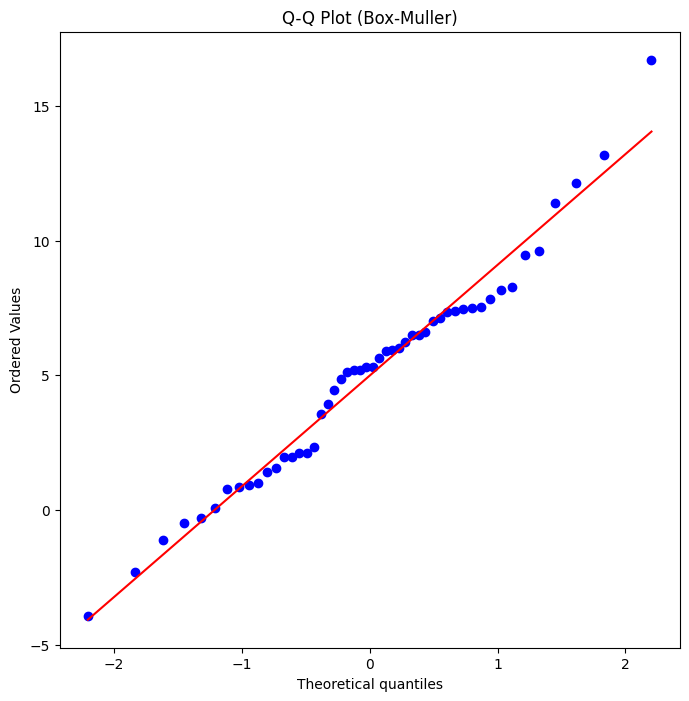

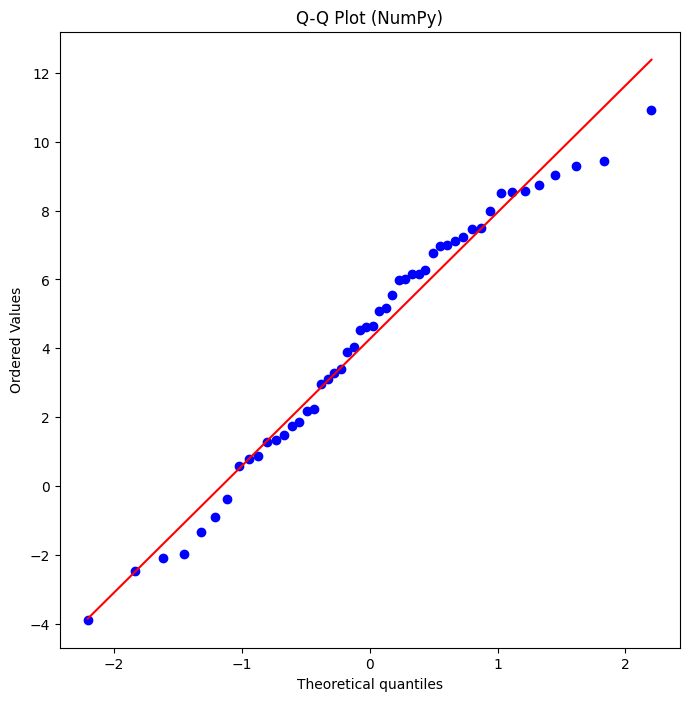

In [17]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# Q-Q plot for Box-Muller vs NumPy
plt.figure(figsize=(8, 8))
stats.probplot(box_muller_rvs, dist="norm", plot=plt)
plt.title("Q-Q Plot (Box-Muller)")

plt.figure(figsize=(8, 8))
stats.probplot(numpy_rvs, dist="norm", plot=plt)
plt.title("Q-Q Plot (NumPy)")

plt.show()
